# Codeclause Internship- Data Science Intern
# By- Aditya Rajendra Karle

# Task-1 
# Churn Prediction in Telecom Industry using Logistic Regression

### Importing Necessary Iibraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Prints Working Directory

In [2]:
pwd

'C:\\Users\\Windows 10\\OneDrive\\Desktop\\Codeclause'

### Reading datatset into memory that is in csv format

In [3]:
telco_cust = pd.read_csv("Telco-Customer-Churn.csv")

### Printing top 10 rows

In [4]:
telco_cust.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Values or Attribute lies in dataset

In [5]:
telco_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Checking datatypes

In [6]:
telco_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_cust.TotalCharges = pd.to_numeric(telco_cust.TotalCharges, errors = 'coerce')
telco_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Removing missing values

In [8]:
telco_cust.dropna(inplace = True)

### Remove Customer ID's from dataset

In [9]:
df2 = telco_cust.iloc[:,1:]

### Now we'll convert predictor variable in  binary numeric value

In [10]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No', value=1, inplace=True)

### Convert all categorical variables into dummy variables

In [11]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Get correlation of churn with other variables

<AxesSubplot:>

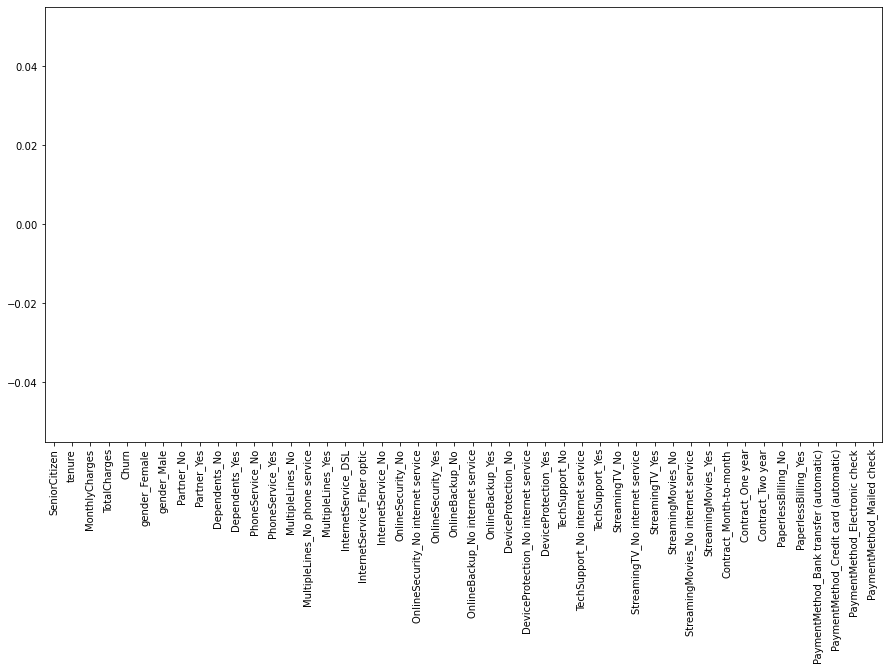

In [12]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

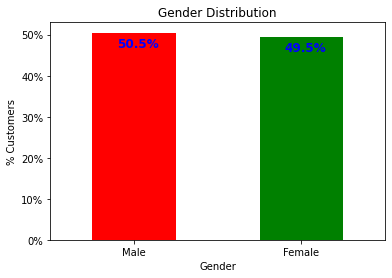

In [13]:
colors = ['Red','Green']
ax = (telco_cust['gender'].value_counts()*100.0/len(telco_cust)).plot(kind='bar',
                                                                              stacked = True,
                                                                             rot=0,
                                                                             color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the ply.patches data
totals=[]

for i in ax.patches:
    totals.append(i.get_width())
    
#set individual bar lables using above list

total=sum(totals)

for i in ax.patches:
    #get width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5,
            str(round((i.get_height()/total),1))+'%',
            fontsize=12,
            color='blue',
           weight='bold')

Text(0.5, 1.0, '% of Senior Citizens')

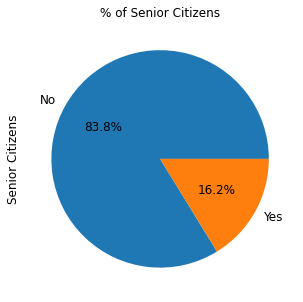

In [14]:
ax=(telco_cust['SeniorCitizen'].value_counts()*100.0/len(telco_cust))\
.plot.pie(autopct='%.1f%%',labels=['No','Yes'],figsize=(5,5),fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens',fontsize=12)

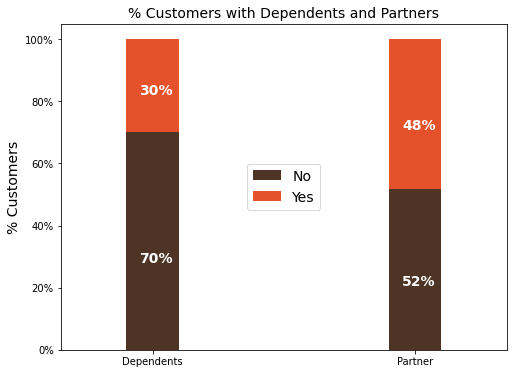

In [15]:
# Correcting the pd.melt function:
df2 = pd.melt(telco_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Grouping and calculating percentages:
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(telco_cust)

# Setting up the plot:
colors = ['#4D3425', '#E4512B']
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors, figsize=(8, 6), rot=0, width=0.2)

# Formatting the y-axis as percentage:
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Setting labels and title:
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with Dependents and Partners', size=14)

# Adding a legend:
ax.legend(loc='center', prop={'size': 14})

# Adding percentage labels above the bars:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)





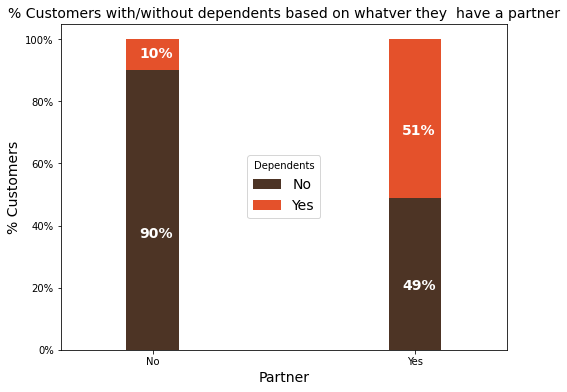

In [16]:
colors = ['#4D3425', '#E4512B']
partner_dependents= telco_cust.groupby(['Partner','Dependents']).size().unstack()
                                        
ax=(partner_dependents.T*100.0/partner_dependents.T.sum()).T.plot(kind='bar',
                                                            width=0.2,
                                                            stacked=True,
                                                            rot=0,
                                                            figsize=(8,6),
                                                            color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title="Dependents",fontsize=14)
ax.set_ylabel('% Customers',size=14)
ax.set_title('% Customers with/without dependents based on whatver they  have a partner',size=14)
ax.xaxis.label.set_size(14)

#code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width, p.get_y()+.4*height),
                color='white',
               weight='bold',
               size=14)

C:\Users\Windows 10\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

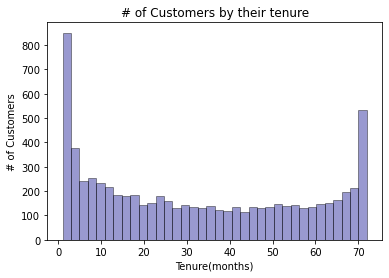

In [17]:
ax = sns.distplot(telco_cust['tenure'],hist=True,kde=False,
             bins=int(180/5),color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure(months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of customers by contract type')

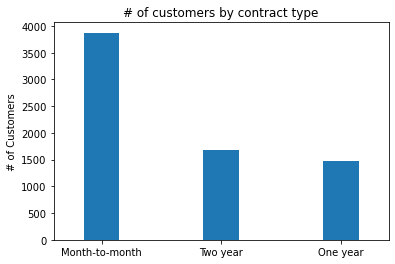

In [18]:
ax=telco_cust['Contract'].value_counts().plot(kind='bar',rot=0,width=0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of customers by contract type')

C:\Users\Windows 10\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year  Contract')

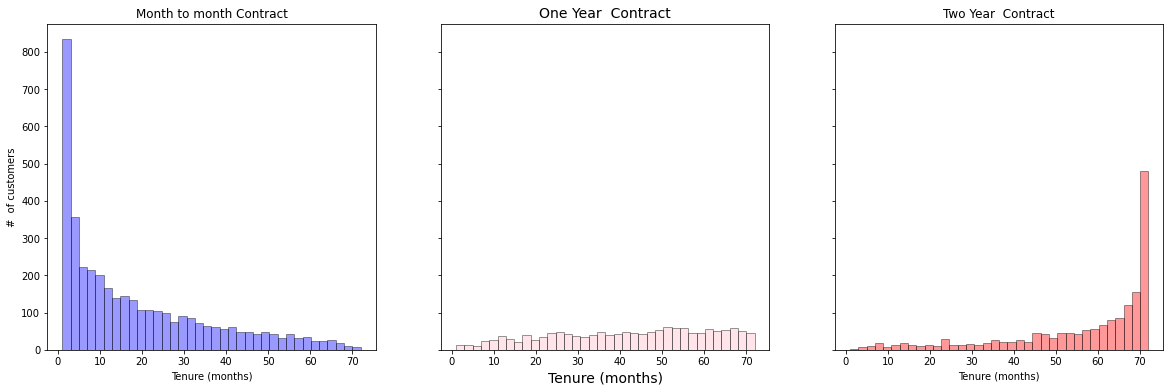

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(20,6))

ax=sns.distplot(telco_cust[telco_cust['Contract']=='Month-to-month']['tenure'],
                 hist=True,kde=False,
                 bins=int(180/5),color='blue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth':4},
               ax=ax1)
ax.set_ylabel('#  of customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to month Contract')

ax=sns.distplot(telco_cust[telco_cust['Contract']=='One year']['tenure'],
                 hist=True,kde=False,
                 bins=int(180/5),color='pink',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth':4},
               ax=ax2)
ax.set_xlabel('Tenure (months)',size=14)
ax.set_title('One Year  Contract',size=14)

ax=sns.distplot(telco_cust[telco_cust['Contract']=='Two year']['tenure'],
                 hist=True,kde=False,
                 bins=int(180/5),color='Red',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth':4},
               ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year  Contract')


### look at the distribution of various services used by customers

In [20]:
telco_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

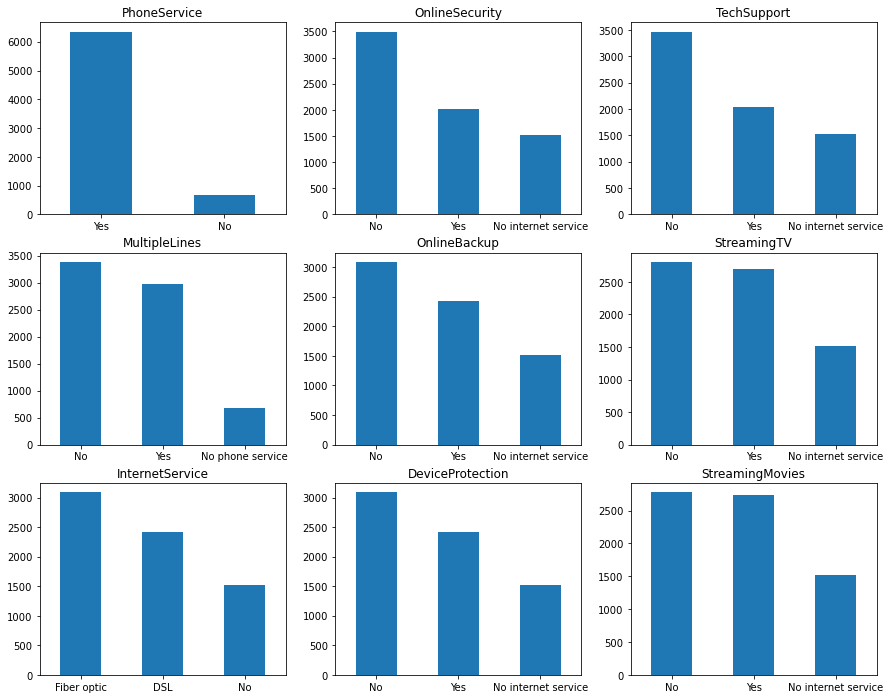

In [21]:
services=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i, item in enumerate(services):
    if i<3:
        ax=telco_cust[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)
        
    elif i >=3 and i < 6:
        ax=telco_cust[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)
        
    elif i<9:
        ax=telco_cust[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0)
    ax.set_title(item)    

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

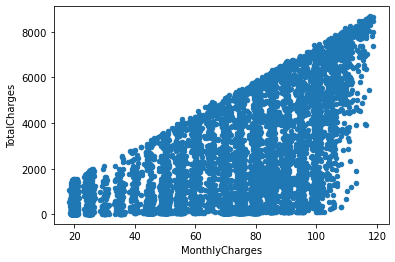

In [22]:
telco_cust[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges',
                                                          y='TotalCharges')

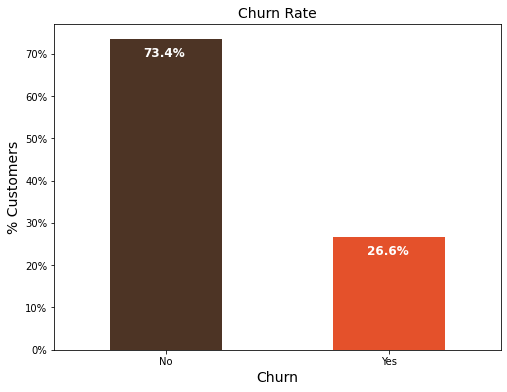

In [23]:
colors = ['#4D3425', '#E4512B']
ax = (telco_cust['Churn'].value_counts()*100.0/len(telco_cust)).plot(kind='bar',
                                                                              stacked=True,
                                                                             rot=0,
                                                                             color=colors,
                                                                            figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size=14)
ax.set_xlabel('Churn',size=14)
ax.set_title('Churn Rate',size=14)

#create a lit to collect the plt.patches data
totals=[]

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    
#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15,i.get_height()-4.0,
             str(round((i.get_height()/total),1))+'%',
             fontsize=12,
             color='white',
            weight='bold')
    


### Churn vs Tenure

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

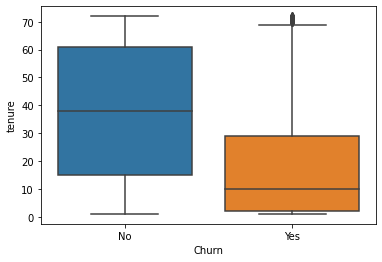

In [24]:
sns.boxplot(x=telco_cust.Churn,y=telco_cust.tenure)

### Churn by contract type

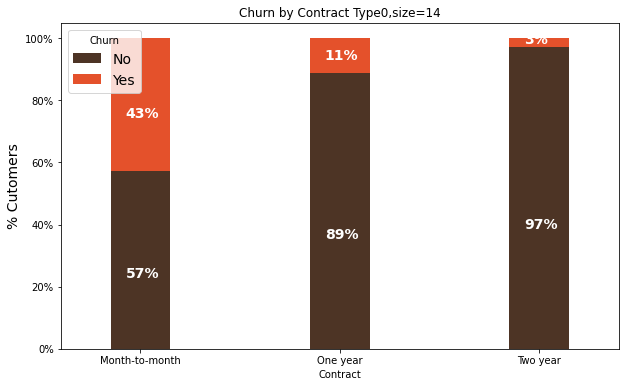

In [25]:
colors = ['#4D3425', '#E4512B']
contract_churn=telco_cust.groupby(['Contract','Churn']).size().unstack()

ax=(contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind='bar',
                                                          width=0.3,
                                                          stacked=True,
                                                          rot=0,
                                                          figsize=(10,6),
                                                          color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('% Cutomers',size=14)
ax.set_title('Churn by Contract Type0,size=14')

#code th add the data labels on the stacked bar chart
for p in ax.patches:
    width, height=p.get_width(),(p.get_height())
    x,y=p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
               color='white',
              weight='bold',
              size=14)
                                                        

### Churn by Semiority

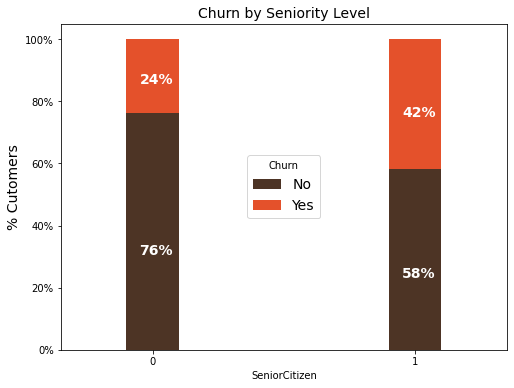

In [26]:
colors = ['#4D3425', '#E4512B']
seniority_churn=telco_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax=(seniority_churn.T*100.0/seniority_churn.T.sum()).T.plot(kind='bar',
                                                          width=0.2,
                                                          stacked=True,
                                                          rot=0,
                                                          figsize=(8,6),
                                                          color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title='Churn')
ax.set_ylabel('% Cutomers',size=14)
ax.set_title('Churn by Seniority Level',size=14)

#code th add the data labels on the stacked bar chart
for p in ax.patches:
    width, height=p.get_width(),(p.get_height())
    x,y=p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
               color='white',
              weight='bold',
              size=14)
                       

### Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

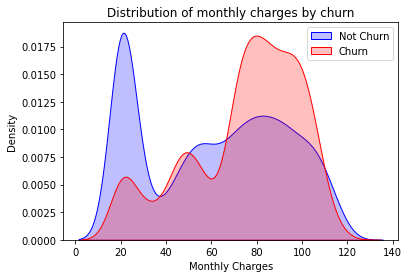

In [27]:
ax=sns.kdeplot(telco_cust.MonthlyCharges[(telco_cust['Churn']=='No')],
              color="Blue",shade=True)
ax=sns.kdeplot(telco_cust.MonthlyCharges[(telco_cust['Churn']=='Yes')],
              ax=ax, color="Red",shade=True)

ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


###  Churn by total charges

Text(0.5, 1.0, 'Distribution of Total charges by churn')

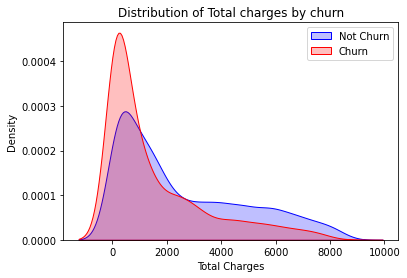

In [28]:
ax=sns.kdeplot(telco_cust.TotalCharges[(telco_cust['Churn']=='No')],
              color="Blue",shade=True)
ax=sns.kdeplot(telco_cust.TotalCharges[(telco_cust['Churn']=='Yes')],
              ax=ax, color="Red",shade=True)

ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn')


### After EDA we'll develope some predictive model and compare 

#### We'll develop Logistic Regression, Random Forest, SVM, ADA Boost, XG Boost

#### 1.Logistic Regression

In [29]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = {'Churn'})

#scaling all the variables to a ramge of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [30]:
#create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test=model.predict(X_test)
#print the prediction accuracy
print(metrics.accuracy_score(y_test,prediction_test))

In [ ]:
#to get the weights pf all the variables
weights=pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

In [ ]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

Observations

Based on above data here are ome hypithesis to explain the patterns in the data:

2 month contract and tenure: It's posible that customers who sign up for longer conracts have a stronger commitments to the service and are less likley to churn. Similarly, customers who have been with the company for a longer period of time may have developed loyalty to the service or have become accustomed to it, making them less likely to sitch to a competitior.

DSL internet service: DSL is a more stable and reliable internet service compared to other options like fibre optic, which may experience more interupptions or connectivity issues. Custmers with DSL may be more satisfied ith the service and therefore less likely to churn.

total charges: It's possible that customers who are paying higher total charges fell that way they are not getting enough value fromservice, leading to dissatisfaction and a hoghrt liklihood of churn

Monthly Contracts and fibre optic internet services: Customers who signup for monthly contratcs may be less commited to the service and more likely to switcch to a competitor it they find a better deal. Similarly, customers with fibre optic internet may be more technologiclly savy and illing o swich to another providder it they can get a faster or cheaper servicec.

Seniority: It is possible that order customer are less likley to churn because they have had had the service for a longer period of time and may have develpoed loyalty to it. Additionally, older customers may be less wwilling to switch to a new service due to the hale invlved in learning a ne ystem or dealing with technical issues.

### 2.Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1,
                                 random_state=50, max_features='auto',
                                 max_leaf_nodes=30)
model_rf.fit(X_train,y_train)

#make predictions
prediction_test=model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

1.0


<AxesSubplot:>

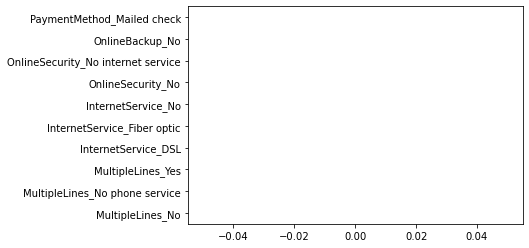

In [48]:
importances = model_rf.feature_importances_
weights=pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind='barh',color='blue')

### 3.Support Vector Machine(SVM)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.svm import SVC


model.svm = SVC(kernel='linear')
model.svm.fit(X_train, y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

In [ ]:
#create confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

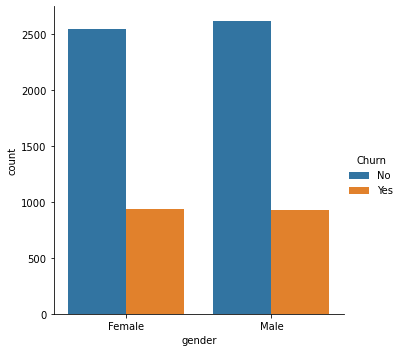

In [68]:
ax1=sns.catplot(x='gender',kind='count',hue='Churn',data=telco_cust,
               estimator=lambda x: sum(x==0)*100.0/len(x))


### ADA Boost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test,preds)

1.0

### XG Boost 

In [72]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)


In [75]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

XG Boost performed better than other techniques used for churn prediction, achieving an accuracy pf almomst 83% on the test data. This is a promising result and it suggest tha XG Boost may be a good choice for this particularr problem.